IMDB란 영화리뷰에서, 긍정과 부정이 있는데 이 값을 한쌍의 데이터 값으로 만든 것이다. 50000개 중 25000개를 트레이닝, 나머지 25000개는 테스팅 샘플이다. 긍정 or 부정이라는 이진 특성을 갖고 있으므로, 바이너리 분류를 목적으로 한다.

여기서는 가장 자주 사용되는 20000개의 단어만 포함했다.

In [1]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

Using TensorFlow backend.


25000개의 트레이닝 샘플을, 20000 / 5000으로 쪼개 각각 트레이닝샘플/트레이닝 이후 테스트 샘플로 나누었다.

In [2]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

밑에서 사용되는 sequence.pad_sequences는, 하나의 리뷰 샘플의 크기를 200이라는 일정한 크기로 맞춰주기 위해 사용하였다.

In [3]:
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

임베딩을 통해 단어간의 연관성을 파악한 벡터가 만들어지기 때문에 훈련하는데 도움이 된다.

LSTM은, long short term memory의 약자이다. 이건 RNN 신경망에서 변형된 형태이다. RNN에서는 훈련이 길어지면, 가중치를 계속 곱하게 되고, 이렇게 되면 결국 0에 가까운 값이 나오기 때문에, 훈련이 잘 되지 않는다. 때문에 LSTM에서는 누적해서 추가하기 보다는, 새로운 input을 보고 기억 데이터의 일부를 삭제한다고 한다.....

sigmoid함수는 지금 이진 분류를 하기 때문에 사용했다.

dropout은 과대적합을 방지하기 위해 추가한 층이다.

Conv1D은 2차원에서도 쓰이지만, 1차원에서도 쓰일 수 있다. RNN보다는 계산 비용이 더 적게 들고 다양한 패턴을 인식할 수 있다. 하지만 연산량이 많아지는 문제점이 있다.

Pooling은 벡터의 특징적인 값 하나를 추출하는 과정이다. 이를 통해 과대적합을 해결하는데 많은 기여를 할 수 있다. GlobalMaxPooling은 가장 큰 특징적인 값을 가져오는 pooling이다.

CNN+ RNN
RNN보다 CNN이 연산량이 적다. 또한 CNN을 통한 학습은 데이터의 특징값들을 효과적으로 추출해낼 수 있다. 하지만, RNN으로는 많은 양으로 학습하기에는 무리가 많다. 때문에, CNN을 통해 먼저 데이터의 특징값들을 효과적으로 추출한 다음, 이 값들을 RNN으로 학습한다. 이렇게 하면 데이터 크기도 줄기 때문에 RNN에서 효과적으로 연산을 할 수 있고, 그 결과 연산 속도와 예측 정확도를 높일 수 있다.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Dropout
from keras.layers import Conv1D, MaxPooling1D

model = Sequential()
model.add(Embedding(20000, 128, input_length=200))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 256)          98560     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,855,809
Trainable params: 2,855,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 117s 6ms/step - loss: 0.4029 - acc: 0.8007 - val_loss: 0.3039 - val_acc: 0.8756
Epoch 2/25
20000/20000 [==============================] - 114s 6ms/step - loss: 0.1881 - acc: 0.9294 - val_loss: 0.3495 - val_acc: 0.8540
Epoch 3/25
20000/20000 [==============================] - 126s 6ms/step - loss: 0.0943 - acc: 0.9679 - val_loss: 0.3987 - val_acc: 0.8624
Epoch 4/25
20000/20000 [==============================] - 132s 7ms/step - loss: 0.0480 - acc: 0.9856 - val_loss: 0.5388 - val_acc: 0.8624
Epoch 5/25
20000/20000 [==============================] - 127s 6ms/step - loss: 0.0345 - acc: 0.9890 - val_loss: 0.5579 - val_acc: 0.8558
Epoch 6/25
20000/20000 [==============================] - 127s 6ms/step - loss: 0.0317 - acc: 0.9891 - val_loss: 0.5916 - val_acc: 0.8604
Epoch 7/25
20000/20000 [==============================] - 130s 7ms/step - l

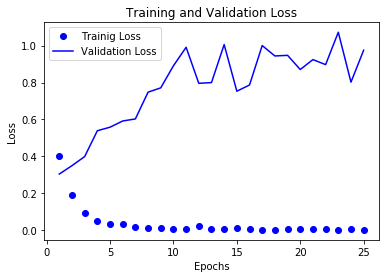

In [9]:
import matplotlib.pyplot as plt

hist_dict=hist.history
loss=hist_dict['loss']
val_loss=hist_dict['val_loss']

epochs=range(1,26)

plt.plot(epochs, loss, 'bo', label='Trainig Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show();

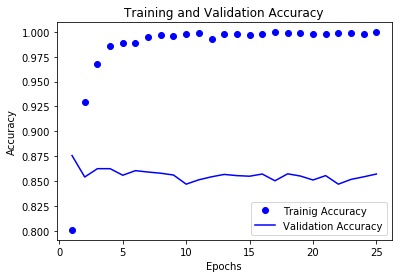

In [12]:
plt.clf()

acc=hist_dict['acc']
val_acc=hist_dict['val_acc']

epochs=range(1,26)

plt.plot(epochs, acc, 'bo', label='Trainig Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show();

In [11]:
result=model.evaluate(x_test, y_test)

25000/25000 [==============================] - 51s 2ms/step


In [13]:
print(result[0])

1.1053071585449576


In [14]:
print(result[1])

0.83796
